<a href="https://colab.research.google.com/github/HuangJin-De/am_NH/blob/main/discussion/20231122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! rm -rf am_NH
! git clone https://github.com/HuangJin-De/am_NH.git

Cloning into 'am_NH'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 309 (delta 143), reused 177 (delta 59), pack-reused 0
Receiving objects: 100% (309/309), 16.81 MiB | 26.81 MiB/s, done.
Resolving deltas: 100% (143/143), done.


(42, 2, 10, 61)
slope =  0.8984451131429122
tau =  5.17147576739318


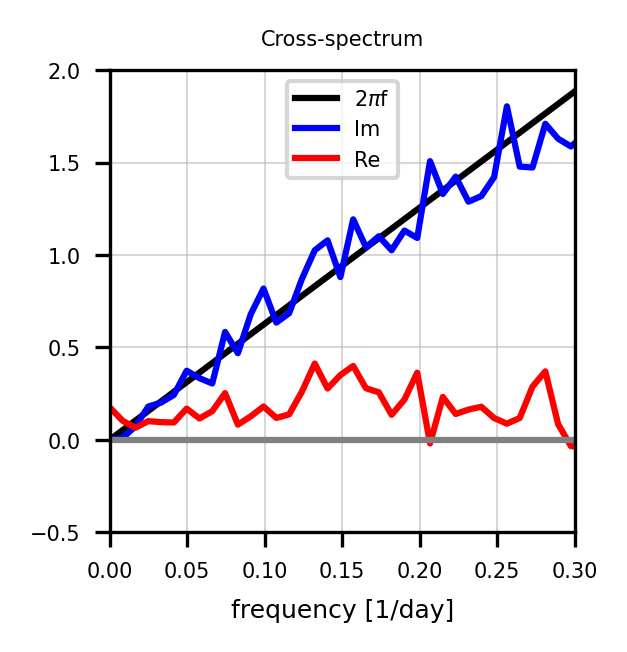

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

path='am_NH'
filen=path+'/train_data/ERA5_crossspectrum_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(42,2,10,-1)

n=38
x=np.arange(0,61)/121
x=x[0:n]

print(data.shape)
#print(x[0:38])

re=np.mean(data[:,0,0,:],0)[0:n]
im=np.mean(data[:,1,0,:],0)[0:n]

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,x*2*np.pi,'k',x,im,'b',x,re,'r',x,x*0.,'gray')
ax.tick_params(labelsize=5)
plt.legend(["2${\pi}$f","Im","Re"],fontsize=5,loc=9)
ax.set_ylim([-0.5,2])
ax.set_yticks(np.arange(-0.5,2.1,0.5))
ax.set_xlim([0,0.3])
ax.set_xticks(np.arange(0,0.31,0.05))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('frequency [1/day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Cross-spectrum',fontsize=5)


model=LinearRegression()
model.fit(x.reshape(-1,1),im.reshape(-1,1))

slope=model.coef_[0][0]/2./np.pi
tao=slope/np.mean(re,0)

print("slope = ",slope)
print("tau = ",tao)


Text(0.5, 1.0, 'Auto-correlation')

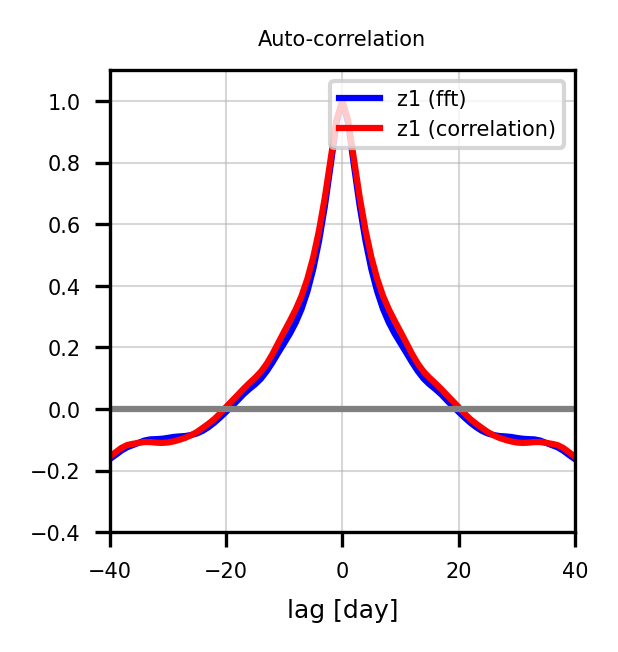

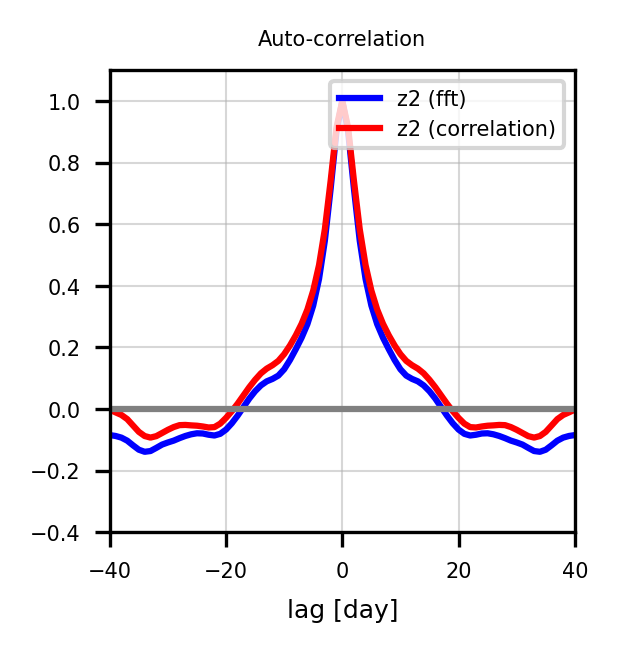

In [32]:
path='am_NH'
filen=path+'/train_data/ERA5_spectrum_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,34,121)

x=np.arange(-60,61)
z1=np.mean(data[:,0,:],0)
z2=np.mean(data[:,1,:],0)

filen=path+'/train_data/auto_corr_data.dat'

data1=np.fromfile(filen,dtype=np.float32)
data1=data1.reshape(-1,34,121)

z1c=np.mean(data1[:,0,:],0)
z2c=np.mean(data1[:,1,:],0)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,z1,'b',x,z1c,'r',x,x*0.,'gray')
ax.tick_params(labelsize=5)
plt.legend(["z1 (fft)","z1 (correlation)"],fontsize=5,loc='upper right')
ax.set_ylim([0.4,1.1])
ax.set_yticks(np.arange(-0.4,1.2,0.2))
ax.set_xlim([-40,40])
ax.set_xticks(np.arange(-40,40.1,20.))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('lag [day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Auto-correlation',fontsize=5)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(x,z2,'b',x,z2c,'r',x,x*0.,'gray')
ax.tick_params(labelsize=5)
plt.legend(["z2 (fft)","z2 (correlation)"],fontsize=5,loc='upper right')
ax.set_ylim([0.4,1.1])
ax.set_yticks(np.arange(-0.4,1.2,0.2))
ax.set_xlim([-40,40])
ax.set_xticks(np.arange(-40,40.1,20.))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel('lag [day]',fontsize=6)
ax.set_ylabel('',fontsize=6)
ax.set_title('Auto-correlation',fontsize=5)


In [33]:
path='am_NH'
filen=path+'/train_data/zm_21days_ori_data.dat'

data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,84)

z1=np.copy(data[:,0:21])
z2=np.copy(data[:,21:42])
m1=np.copy(data[:,42:63])
m2=np.copy(data[:,63:84])

print(z1.shape,z2.shape,m1.shape,m2.shape)
#print(z1[0,:])
#print(m1[0,:])

(4242, 21) (4242, 21) (4242, 21) (4242, 21)


estimations of b11, b12, b21, and b22.

In [44]:
def cal_reg_coef(x,y):
  model=LinearRegression()
  model.fit(x,y)
  return model.coef_[0,0]


b11=[]
b12=[]
b21=[]
b22=[]

n=0
for i in np.arange(8,21):
  lag_z1z1=cal_reg_coef(z1[:,n].reshape(-1,1),z1[:,i].reshape(-1,1))
  lag_z2z1=cal_reg_coef(z1[:,n].reshape(-1,1),z2[:,i].reshape(-1,1))
  lag_z1z2=cal_reg_coef(z2[:,n].reshape(-1,1),z1[:,i].reshape(-1,1))
  lag_z2z2=cal_reg_coef(z2[:,n].reshape(-1,1),z2[:,i].reshape(-1,1))
  lag_m1z1=cal_reg_coef(z1[:,n].reshape(-1,1),m1[:,i].reshape(-1,1))
  lag_m1z2=cal_reg_coef(z2[:,n].reshape(-1,1),m1[:,i].reshape(-1,1))
  lag_m2z1=cal_reg_coef(z1[:,n].reshape(-1,1),m2[:,i].reshape(-1,1))
  lag_m2z2=cal_reg_coef(z2[:,n].reshape(-1,1),m2[:,i].reshape(-1,1))

  a1=np.matrix([[lag_z1z1, lag_z2z1],
   [lag_z1z2, lag_z2z2]])
  b1=np.matrix([[lag_m1z1], [lag_m1z2]])

  x1=np.matmul(np.linalg.inv(a1),b1)

  b11.append(x1[0])
  b12.append(x1[1])

  #print("b11=",x1[0])
  #print("b12=",x1[1])

  a2=np.matrix([[lag_z2z1, lag_z1z1],
   [lag_z2z2, lag_z1z2]])
  b2=np.matrix([[lag_m2z1], [lag_m2z2]])

  x2=np.matmul(np.linalg.inv(a2),b2)

  b21.append(x2[0])
  b22.append(x2[1])

  #print("b21=",x2[0])
  #print("b22=",x2[1])

print("b11=",np.mean(b11))
print("b12=",np.mean(b12))
print("b21=",np.mean(b21))
print("b22=",np.mean(b22))


b11= 0.05886149
b12= 0.025665889
b21= 0.09135736
b22= -0.05224399
